# MarketProphet

## Data Exploration and Preprocessing:

### Loading the dataset.

In [75]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns



In [76]:
data_frame = pd.read_csv('E:\\University\\Machine Learning\\Asignments\\Serie 3\\ECommerce_consumer behaviour.csv')

data_frame

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
...,...,...,...,...,...,...,...,...,...,...,...,...
2019496,3390742,199430,16,3,18,5.0,83,8,0,4,produce,fresh vegetables
2019497,458285,128787,42,2,19,3.0,115,1,1,7,beverages,water seltzer sparkling water
2019498,458285,128787,42,2,19,3.0,32,2,1,4,produce,packaged produce
2019499,458285,128787,42,2,19,3.0,32,3,1,4,produce,packaged produce


### Data understanding

In [77]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


lets check for null values

In [78]:
data_frame.isnull().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

we can see the large amount of null value in 'days_since_prior_order'
Now we will remove these null values 

In [79]:
data_frame['days_since_prior_order'].unique()

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

In [80]:
for col in data_frame.columns:
    if data_frame[col].dtypes  == 'float64':        
        data_frame[col].fillna(-1, inplace=True )

In [81]:
data_frame.isnull().sum()

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_id                0
add_to_cart_order         0
reordered                 0
department_id             0
department                0
product_name              0
dtype: int64

In [82]:
data_frame['days_since_prior_order'] = data_frame['days_since_prior_order'].astype(np.int64)

data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype 
---  ------                  ----- 
 0   order_id                int64 
 1   user_id                 int64 
 2   order_number            int64 
 3   order_dow               int64 
 4   order_hour_of_day       int64 
 5   days_since_prior_order  int64 
 6   product_id              int64 
 7   add_to_cart_order       int64 
 8   reordered               int64 
 9   department_id           int64 
 10  department              object
 11  product_name            object
dtypes: int64(10), object(2)
memory usage: 184.9+ MB


In [83]:
grouped = data_frame.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

grouped

5      14242
6      14146
4      13760
7      13695
8      12741
       ...  
95         1
83         1
137        1
100        1
87         1
Name: add_to_cart_order, Length: 82, dtype: int64

### Data Preparation

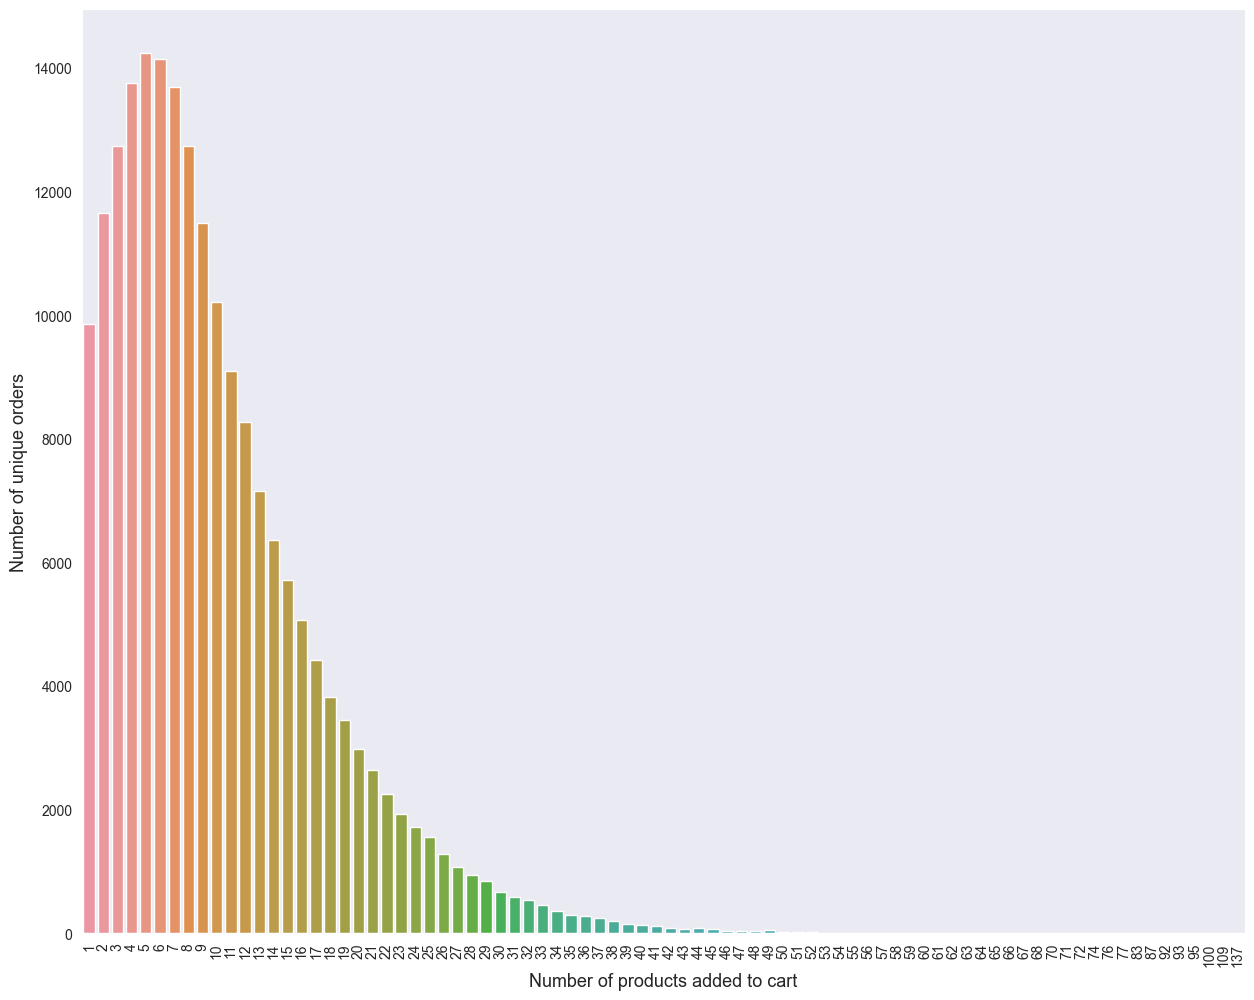

In [84]:
grouped = data_frame.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
grouped = grouped.add_to_cart_order.value_counts()

sns.set_style('dark')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values)  # Specify x and y explicitly

sns.color_palette("husl", 10)

plt.ylabel('Number of unique orders', fontsize=13)
plt.xlabel('Number of products added to cart', fontsize=13)
plt.show()


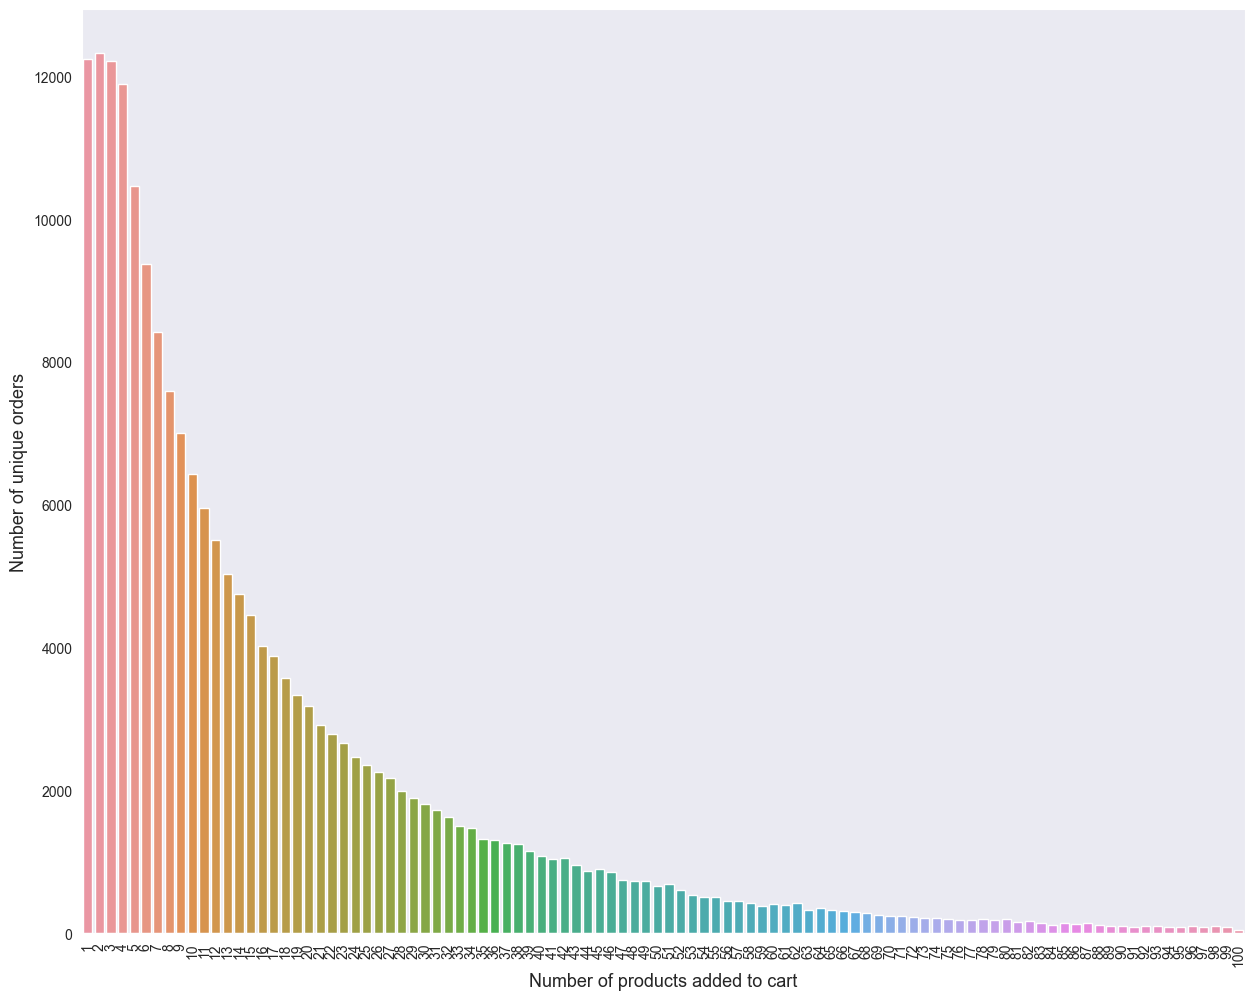

In [85]:
grouped = data_frame.groupby("order_id")["order_number"].aggregate("max").reset_index()
grouped = grouped.order_number.value_counts()

sns.set_style('dark')
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values)  # Specify x and y explicitly

sns.color_palette("husl", 10)

plt.ylabel('Number of unique orders', fontsize=13)
plt.xlabel('Number of products added to cart', fontsize=13)
plt.show()


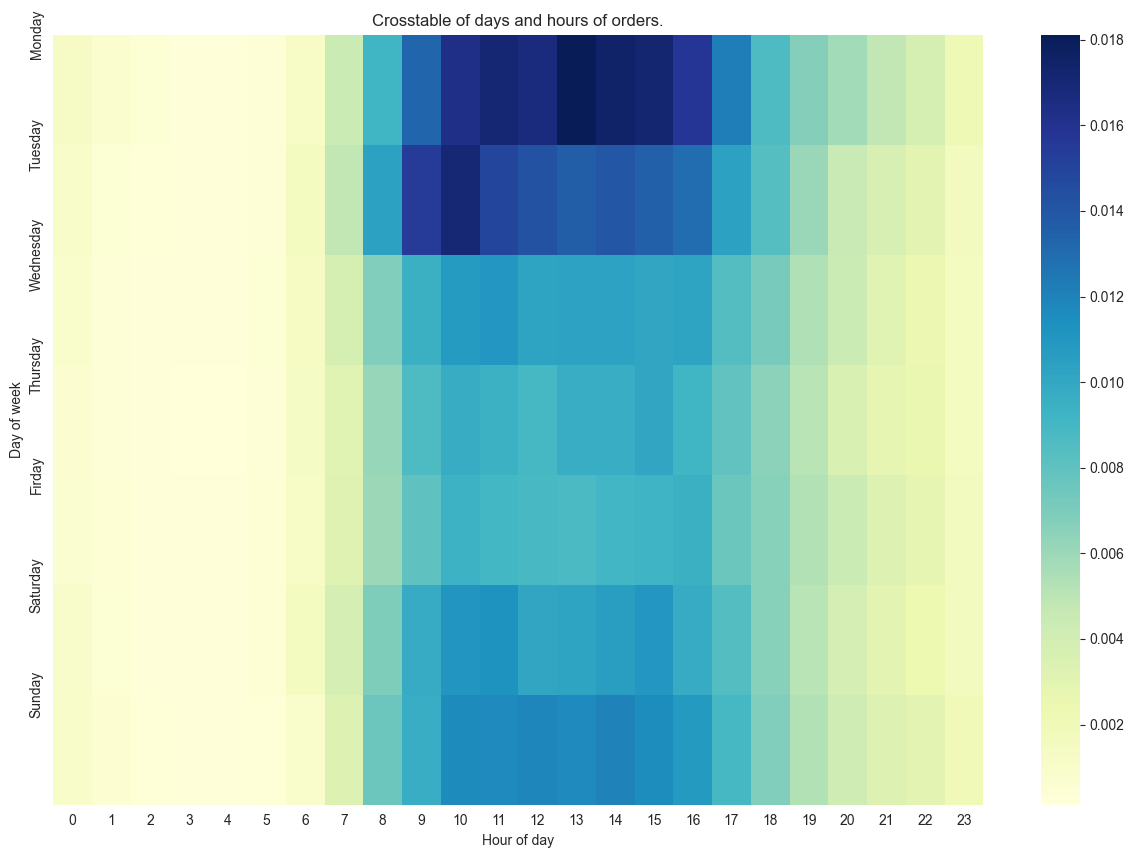

In [86]:
grouped = data_frame.groupby(["order_dow", "order_hour_of_day"])["order_number"].count().reset_index()
grouped = data_frame.pivot_table(index="order_dow", columns="order_hour_of_day", values="order_number", aggfunc="count") / data_frame.shape[0]

plt.figure(figsize=(15, 10))
sns.heatmap(grouped, cmap='YlGnBu')
plt.yticks([0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday", "Wednesday", "Thursday", "Firday", "Saturday", "Sunday"])
plt.xticks(rotation=0)
plt.ylabel("Day of week")
plt.xlabel("Hour of day")
plt.title("Crosstable of days and hours of orders.")

plt.show()

C:\Users\alireza\AppData\Local\Temp\ipykernel_1272\3891737946.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped  = grouped.groupby(['product_name']).sum()['reordered'].sort_values(ascending=False)


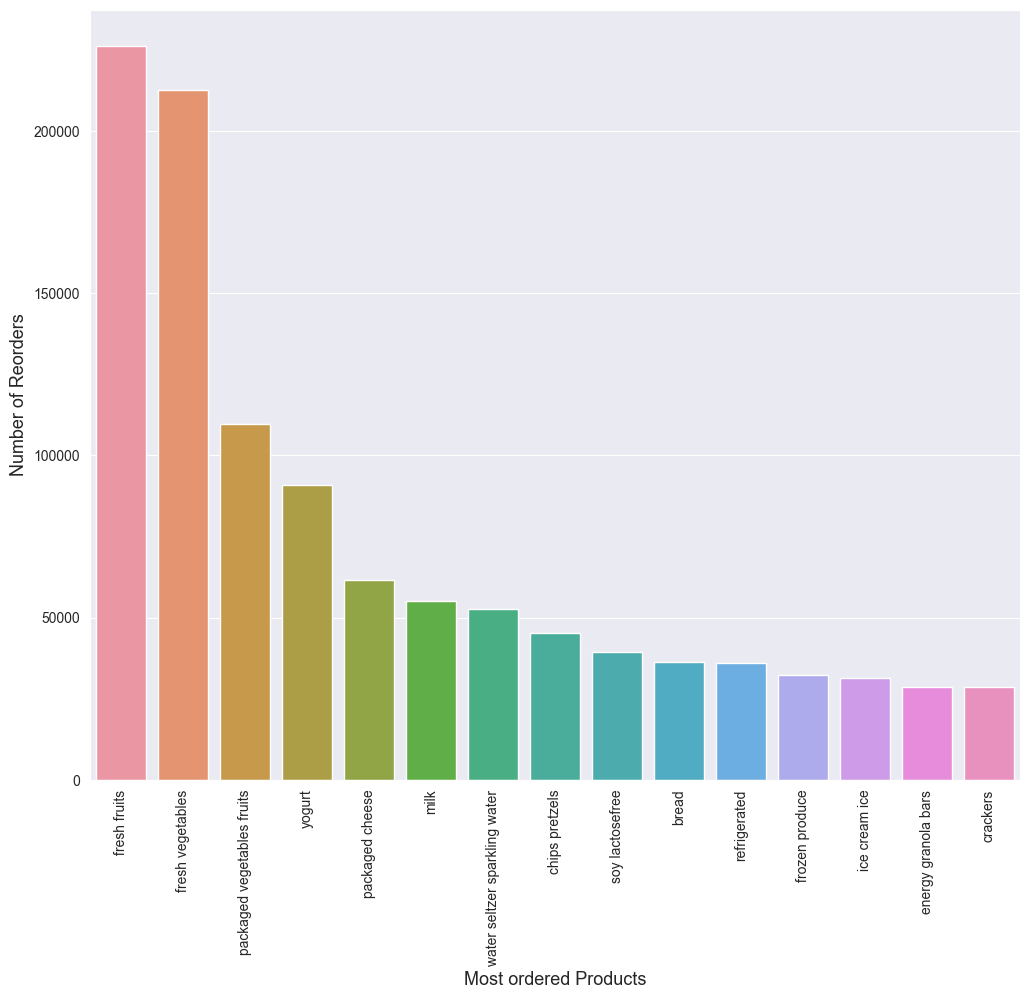

In [87]:
grouped = data_frame.groupby(["product_id","product_name","department"])["reordered"].aggregate('count').reset_index()
grouped = grouped.sort_values(by='reordered', ascending=False)[:15].reset_index()

grouped  = grouped.groupby(['product_name']).sum()['reordered'].sort_values(ascending=False)

sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(12, 10))
plt.xticks(rotation='vertical')
sns.barplot(x=grouped.index, y=grouped.values)
plt.ylabel('Number of Reorders', fontsize=13)
plt.xlabel('Most ordered Products', fontsize=13)
plt.show()

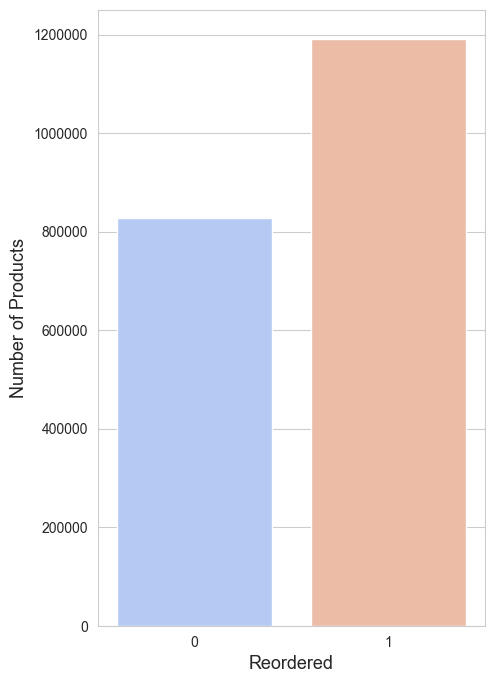

In [88]:
grouped = data_frame.groupby("reordered")["product_id"].aggregate('count').reset_index()
grouped['Ratio'] = grouped["product_id"].apply(lambda x: x /grouped['product_id'].sum())
grouped  = grouped.groupby(["reordered"]).sum()['product_id'].sort_values(ascending=False)

sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(5, 8))
sns.barplot(x=grouped.index, y=grouped.values, palette='coolwarm')
plt.ylabel('Number of Products', fontsize=13)
plt.xlabel('Reordered', fontsize=13)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Preprocess the data :

handle categorical variables (encode using one-hot encoding) and normalize or scale numerical features (e.g., using StandardScaler).

In [89]:
data_frame = pd.get_dummies(data_frame)

Normalize or Scale Numerical Features:

In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_frame_scaled = scaler.fit_transform(data_frame[['order_number', 'add_to_cart_order']])

In [98]:
numerical_features = ['order_number', 'add_to_cart_order']
data_frame = pd.DataFrame(data_frame, columns=numerical_features)

# View the scaled data
print(data_frame)

         order_number  add_to_cart_order
0                   1                  1
1                   1                  2
2                   1                  3
3                   1                  4
4                   1                  5
...               ...                ...
2019496            16                  8
2019497            42                  1
2019498            42                  2
2019499            42                  3
2019500            42                  4

[2019501 rows x 2 columns]


### Modeling

In [101]:
from sklearn.cluster import KMeans

k = 10
k_means = KMeans(n_clusters=k, random_state=42)
k_means.fit(data_frame) 

cluster_labels = k_means.labels_

c:\Users\alireza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
